# Comprehensive Example of Applying Several Classifiers on a Real Dataset


**Learning Outcomes**
1. Gain insight by visualising the dataset.
2. Prepare the dataset for the classification task. 
3. Fit several models based on the training set to classify the survival of a person on the titanic ship. 
4. Compare between the different models performance on the test set.

We have seen earlier, in unit 1, how to prepare, visualise and filter the titanic dataset. While in units 2, 3, 4 and 5 we have seen several techniques that can fit(train) a model to predict the class of an instance given a training dataset. We have also seen how to split the data in order to come up with an unbiased estimation of the generalisation ability of the classifier to predict unseen instances.

In this exercise you will perform a classification task to predict the survival of people from the titanic dataset.
You will apply several of the aforementioned concepts in order to prepare, visualise and split the data appropriately. You will then fit several models and compare between them to pick the one that performs best on the given dataset.
This exercise is useful for your project, but bear in mind that it will not address all aspects of the project.


In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [8]:
# use this to retrieve the titanic data online
titanic = pd.read_csv('~/com501/datasets/titanic.csv') 
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareAgeRatio,AgeRescaled,FareRescaled
0,597,598,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,NaN,S,0.0,0.610455,0.0
1,302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,NaN,S,0.0,0.233476,0.0
2,179,180,0,3,"Leonard, Mr. Lionel",1,36.0,0,0,LINE,0.0,NaN,S,0.0,0.447097,0.0
3,806,807,0,1,"Andrews, Mr. Thomas Jr",1,39.0,0,0,112050,0.0,A36,S,0.0,0.484795,0.0
4,271,272,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,NaN,S,0.0,0.308872,0.0


In [9]:
print(titanic.columns)

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FareAgeRatio',
       'AgeRescaled', 'FareRescaled'],
      dtype='object')


## Filter unnecessary fields

In [10]:
titanic = titanic[['Pclass','Sex', 'Age', 'SibSp', 'Fare', 'Survived' ]]
titanic.head(10)

,Pclass,Sex,Age,SibSp,Fare,Survived
0,3,1,49.0,0,0.0000,0
1,3,1,19.0,0,0.0000,0
2,3,1,36.0,0,0.0000,0
3,1,1,39.0,0,0.0000,0
4,3,1,25.0,0,0.0000,1
5,1,1,40.0,0,0.0000,0
6,1,1,38.0,0,0.0000,0
7,3,1,61.0,0,6.2375,0
8,3,1,74.0,0,7.7750,0
9,3,1,70.5,0,7.7500,0


## Deal with missing values

In [11]:
missing_data = titanic.isnull().any()
print(missing_data)

Pclass      False
Sex         False
Age          True
SibSp       False
Fare        False
Survived    False
dtype: bool


The above means that we only need to deal with missing age in this version of the titanic dataset

### Deal with missing ages

In [12]:
missing_ages = titanic[titanic['Age'].isnull()].shape[0]
print('Before Filtering Out Missing Ages, No of Records is ', missing_ages)

meanAge = int(titanic['Age'].mean())
titanic = titanic.fillna(meanAge)

missing_ages = titanic[titanic['Age'].isnull()].shape[0]
print('After Filtering Out Missing Ages, No of Records is ', missing_ages)

Before Filtering Out Missing Ages, No of Records is  177
After Filtering Out Missing Ages, No of Records is  0


### Thorough checking/dealing for missing-ness just in case

In [13]:
for col in titanic.columns:
    
    missing_data = titanic[titanic[col].isnull()].shape[0]
    print('Before Filtering Out Missing {}, No of Records is {} '.format(col, missing_data))
    
    titanic = titanic.dropna()
    titanic.head(10)
    
    missing_data = titanic[titanic[col].isnull()].shape[0]
    print('After Filtering Out Missing {}, No of Records is {} '.format(col, missing_data))
    


Before Filtering Out Missing Pclass, No of Records is 0 
After Filtering Out Missing Pclass, No of Records is 0 
Before Filtering Out Missing Sex, No of Records is 0 
After Filtering Out Missing Sex, No of Records is 0 
Before Filtering Out Missing Age, No of Records is 0 
After Filtering Out Missing Age, No of Records is 0 
Before Filtering Out Missing SibSp, No of Records is 0 
After Filtering Out Missing SibSp, No of Records is 0 
Before Filtering Out Missing Fare, No of Records is 0 
After Filtering Out Missing Fare, No of Records is 0 
Before Filtering Out Missing Survived, No of Records is 0 
After Filtering Out Missing Survived, No of Records is 0 


## Stats and Visualisation for classes

### Survival rates

<BarContainer object of 2 artists>

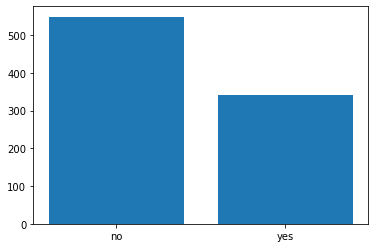

In [14]:
not_survived = titanic[titanic['Survived']==0].shape[0]
survived = titanic[titanic['Survived']==1].shape[0]
plt.bar(['no','yes'], [not_survived, survived])

The above shows that the more dominant class is not survived. In other words, not surviving is more likely than surviving for people in the titanic

### Gender/Survival stats.
Let us get some stats regarding gender

<AxesSubplot:xlabel='Sex,Survived'>

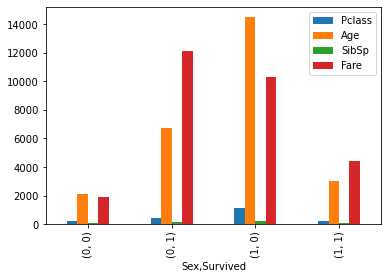

In [15]:
titanic.groupby(['Sex','Survived']).sum().plot.bar()

The above operation grouped by gender and summed over all attributes. We might want to consider the mean here as it is more meaningful :-)

<AxesSubplot:xlabel='Sex,Survived'>

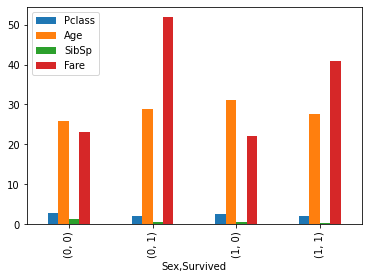

In [16]:
titanic.groupby(['Sex','Survived']).mean().plot.bar()

### Gender/Survival rates

In [17]:
titanic_sex_survive = titanic.groupby(['Survived', 'Sex'])['Survived'].count()
titanic_sex_survive.head()

Survived  Sex
0         0       81
          1      468
1         0      233
          1      109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived,Sex'>

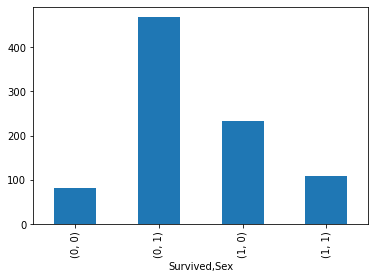

In [18]:
titanic_sex_survive.plot.bar()

# Classifying the titanic dataset

Ok so now we are ready to do more serious classification after we gained some insight into our dataset

In [19]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split


In [20]:
X = titanic[['Pclass','Sex', 'Age', 'SibSp', 'Fare']]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
y_test.shape[0]

295

The below will cause an error since there are categorical data that needs to be converted to ‎numerical

In [22]:
# DT = DecisionTreeClassifier().fit(X_train, y_train)

## Categorical to Numerical

In [23]:
labels = titanic['Sex'].astype('category').cat.categories.tolist()
replace_sex = {'Sex' : {k: v for k,v in zip(labels,list(range(len(labels)+1)))}}
print(replace_sex)


titanic.replace(replace_sex, inplace=True)

titanic.head()

{'Sex': {0: 0, 1: 1}}


,Pclass,Sex,Age,SibSp,Fare,Survived
0,3,1,49.0,0,0.0,0
1,3,1,19.0,0,0.0,0
2,3,1,36.0,0,0.0,0
3,1,1,39.0,0,0.0,0
4,3,1,25.0,0,0.0,1


## Split the Data

In [24]:
X = titanic[['Sex', 'Age', 'SibSp', 'Fare', 'Pclass']]
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Fit the classifiers

In [25]:
DT   = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
kNN  = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
LogR = LogisticRegression(max_iter=100).fit(X_train, y_train)

### Visualise the tree 

In [26]:
# plt.figure(figsize=(14, 12))
# plot_tree(DT, filled=True)
# plt.show()

### Confusion Matrix and Performance Metrics

Let us plot the normalised confusion matrix using true classes to get the pr(detect+) and pr(detect-) directly inside the matrix. You can calculate these as well using the recall score.

Let us do it first for the decision tree and then we write a helper function to return the metrics and confusion matrix for other classifiers

### pr(detect)

pr(detect+) for DT =  0.8756476683937824
pr(detect-) for DT=  0.696078431372549


/Users/karan.verma/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


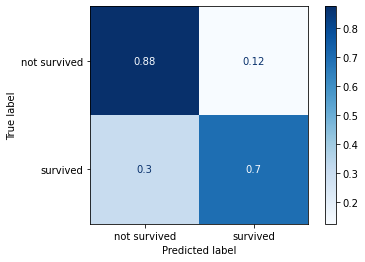

In [27]:
target_labels = ['not survived', 'survived']
confusion   = plot_confusion_matrix(DT, X_test, y_test, display_labels=target_labels, cmap=plt.cm.Blues, normalize='true')
#print('normalised confusion matrix as per actual classes =\n ', confusion.confusion_matrix)
pr_detect_plus  = confusion.confusion_matrix[0,0]
pr_detect_minus = confusion.confusion_matrix[1,1]
print('pr(detect+) for DT = ', pr_detect_plus)
print('pr(detect-) for DT= ', pr_detect_minus)

### pr(predict)
Now normalise using prediction to get the pr(predict+) and pr(predict-)

pr(predict+) =  0.8177083333333334
pr(predict-) =  0.8252427184466019


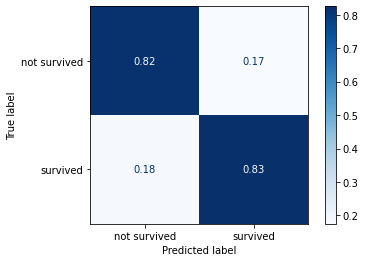

In [21]:
confusion = plot_confusion_matrix(DT, X_test, y_test, display_labels=target_labels, cmap=plt.cm.Blues, normalize='pred')
#print('normalised confusion matrix as per predicted classes =\n ',confusion.confusion_matrix)
pr_predict_plus  = confusion.confusion_matrix[0,0]
pr_predict_minus = confusion.confusion_matrix[1,1]
print('pr(predict+) = ', pr_predict_plus)
print('pr(predict-) = ', pr_predict_minus)

### Helper Function
Now we write our helper function

In [22]:

def plot_confusion_detect(cls, X_test, y_test, display_labels):
    confusion = plot_confusion_matrix(cls, X_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues,
                                      normalize='true')
    
    pr_detect_plus  = confusion.confusion_matrix[0,0]
    pr_detect_minus = confusion.confusion_matrix[1,1]
        
    print('pr(detect+) = ', pr_detect_plus)
    print('pr(detect-) = ', pr_detect_minus)
    print('')
    
    return pr_detect_plus, pr_detect_minus, confusion
def plot_confusion_predict(cls, X_test, y_test, display_labels):
    confusion = plot_confusion_matrix(cls, X_test, y_test, display_labels=display_labels, cmap=plt.cm.Blues,
                                      normalize='pred')
    
    pr_predict_plus  = confusion.confusion_matrix[0,0]
    pr_predict_minus = confusion.confusion_matrix[1,1]
        
    print('pr(predict+) = ', pr_predict_plus)
    print('pr(predict-) = ', pr_predict_minus)
    print('')
        
    return pr_predict_plus, pr_predict_minus, confusion


def plot_confusion_pred(cls, X_test, y_test, display_labels, detect_predict ='true'):
    if detect_predict =='true': return plot_print_confusion_detect(cls, X_test, y_test, display_labels)
    if detect_predict =='pred': return plot_print_confusion_predict(cls, X_test, y_test, display_labels)
    

Now we will use some of the previous function in order to measure the performance of the ‎different fitted models.

pr(detect+) =  0.8971428571428571
pr(detect-) =  0.7083333333333334

pr(detect+) =  0.8457142857142858
pr(detect-) =  0.5416666666666666

pr(detect+) =  0.8742857142857143
pr(detect-) =  0.7166666666666667

The max detect is 0.8971428571428571 and the winner classifier is Decision Tree


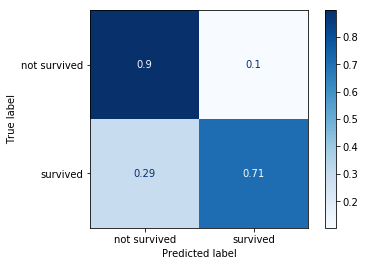

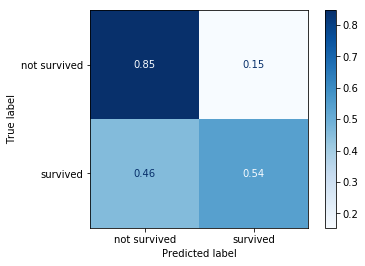

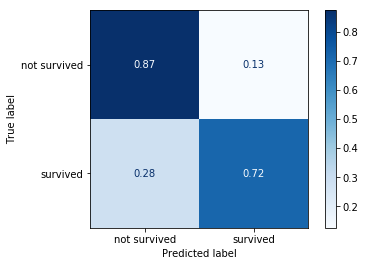

In [25]:
pr_detect_plus_DT, _ ,_ = plot_confusion_detect(DT, X_test, y_test, display_labels=target_labels)
pr_detect_plus_kNN, _ ,_ = plot_confusion_detect(kNN, X_test, y_test, display_labels=target_labels)
pr_detect_plus_LogR, _ ,_ = plot_confusion_detect(LogR, X_test, y_test, display_labels=target_labels)

pr_detect_plus          = [pr_detect_plus_DT, pr_detect_plus_kNN, pr_detect_plus_LogR ]
pr_detect_plus_max      = max(pr_detect_plus)
pr_detect_plus_max_ind  = pr_detect_plus.index(pr_detect_plus_max)

classifiers_names = ["Decision Tree", "Nearest Neighbors",  "Logistic Regression"]

print('The max detect is {} and the winner classifier is {}'.format(pr_detect_plus_max, 
                                                                classifiers_names[pr_detect_plus_max_ind]))

## Your turn

Optimise the max_depth, k and apply cross validation and see if this improve the detection rates